In [26]:
# <!-- collapse=True -->
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Régression non-paramétrique: moyenne glissante

Lecture du chapitre 16 du livre _Probabilités, analyses des données et Statistique, Gilbert Saporta_.


Effectuer une moyenne glissante est un bon moyen pour lisser une mesure, et reduire l'influence du bruit. Mais comment choisir la taille de la fenêtre ? 

On peut penser chercher la taille d'intervalle qui minimise la somme du carré des écarts, mais on obtiendra alors la taille la plus petite possible (c.a.d. 1)...

Une astuce consiste à rechercher la taille de fenêtre optimale en retirant de la moyenne la valeur au centre. C'est-à-dire que l'on cherche à estimer la valeur au centre à partir de la valeur des voisins. 

In [64]:
# moyenne glissante **centrée**
def moyenneGlissante( X, Y, k ):
    n = 2*k+1
    S = np.cumsum( np.insert(Y, 0, 0) )
    M = ( S[n:] - S[:-n] )/n
    return X[k:-k], M

In [65]:
X = np.linspace(0, 1, 100)

Y0 = 4*np.sin( X*12 ) + 15*X
Y = Y0 + np.random.normal(loc=0.0, scale=1.0, size=len(X))

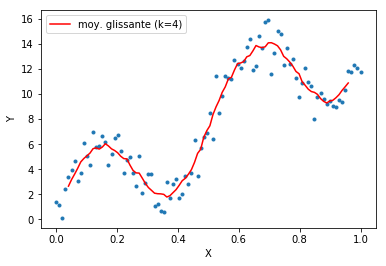

In [66]:
k = 4
Xm, Ym = moyenneGlissante( X, Y, 4 )

plt.plot( X, Y, "." );
plt.plot( Xm, Ym, "-r", label='moy. glissante (k=%i)'%k );
plt.xlabel('X'); plt.ylabel('Y')
plt.legend();

In [74]:
def costfun_simple(X, Y, k):
    Xm, Ym = moyenneGlissante( X, Y, k )
    return np.sum( ( Y[k:-k] - Ym )**2 )

In [32]:
# moyenne glissante **centrée** sans le point centrale
def moyenneGlissante_obliteree( X, Y, k ):
    n = 2*k+1
    S = np.cumsum( np.insert(Y, 0, 0) )
    M = ( S[n:] - S[:-n] - Y[k:-k] )/(n-1)
    return X[k:-k], M

def costfun_obliteree(X, Y, k):
    Xm, Ym = moyenneGlissante_obliteree( X, Y, k )
    return np.sum( ( Y[k:-k] - Ym )**2 )

k_min = 5


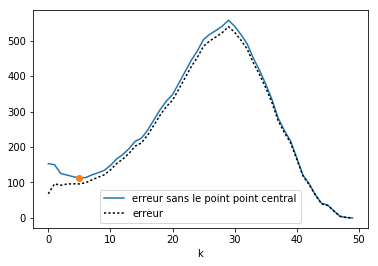

In [75]:
cost = [ costfun_obliteree( X, Y, k+1 ) for k in range(int(len(X)/2)) ]
cost_simple = [ costfun_simple(X, Y, k+1 ) for k in range(int(len(X)/2)) ]

k_min = np.argmin(cost[:int(len(X)/4)] ) 
print( 'k_min = %i'%k_min )

plt.plot( cost , label='erreur sans le point point central'  )
plt.plot(cost_simple, ':k', label='erreur'  )

plt.plot( k_min, cost[k_min], 'o'  )
plt.xlabel('k'); plt.legend();

**Il y a bien un minimum, permetant de choisir la taille de fenêtre optimale...**

_Remarque: _ c'est un minimum local, pour k de l'ordre du nombre de points total la somme des écarts diminue

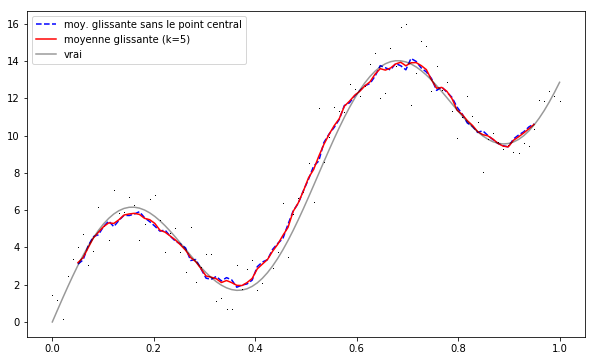

In [76]:
k = k_min

plt.figure( figsize=(10, 6) )
Xm, Ym = moyenneGlissante_obliteree( X, Y, k )
len( Ym ), len( Xm )
plt.plot( Xm, Ym, "--b", label='moy. glissante sans le point central' );

plt.plot( X, Y, ",k" );
Xm, Ym = moyenneGlissante( X, Y, k )
plt.plot( Xm, Ym, "-r", label='moyenne glissante (k=%i)'%k );

plt.plot( X, Y0, "-k", alpha=.4, label='vrai');

plt.legend();

#### Questions
* Avec une regression linéaire glissante ? (ordre 1 ou 2) ... Voir "Kernel Smoothing"
* Avec une Spline...


* Si plusieurs fréquence dans la fonction ?
* Cross-Validation, Boostrap ... ?



voir:
[Nonparametric Regression, Statistical Machine Learning, Spring 2015]( http://www.stat.cmu.edu/~larry/=sml/nonpar.pdf )

## Avec plusieurs fréquences...
Sur des données réelles, et à tendances fractales

Il y a quatres fréquences importantes:
    * Fréquence d'échantillonage
    * Fréquence du bruit
    * Fréquence de filtrage (celle du modèle)
    * Fréquence du signal utile

de la plus haute à la plus faible, à priori...

In [77]:
data = np.load('./timeseriesdata.npy', encoding='bytes').item()
X, Y = data['DEXUSEU.csv']

X = (X-min(X))/(max(X)-min(X)) # Pour les splines

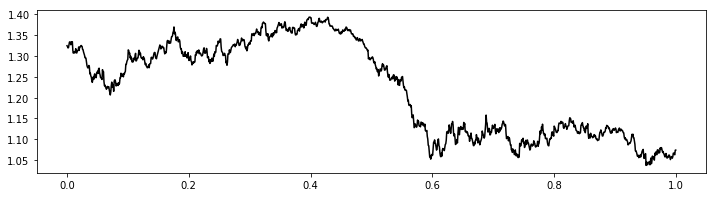

In [78]:
plt.figure(figsize=(12, 3))
plt.plot( X, Y, "k-" );

k_min = 0


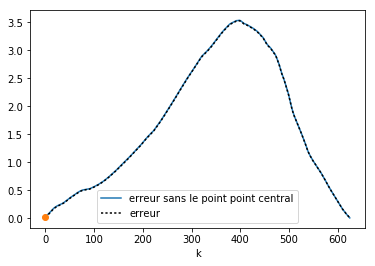

In [79]:
cost = [ costfun_obliteree( X, Y, k+1 ) for k in range(int(len(X)/2)) ]
cost_simple = [ costfun_simple(X, Y, k+1 ) for k in range(int(len(X)/2)) ]

k_min = np.argmin(cost[:int(len(X)/4)] ) 
print( 'k_min = %i'%k_min )

plt.plot( cost , label='erreur sans le point point central'  )
plt.plot(cost_simple, ':k', label='erreur'  )

plt.plot( k_min, cost[k_min], 'o'  )
plt.xlabel('k'); plt.legend();

pas vraiment convaincant... _à suivre..._